In [ ]:
import matplotlib.pyplot as plt
from L_sys.base import LSystem
from L_sys.builtin import (
    DragonCurve,
    FractalTree,
    FractalPlant,
    Sierpinski
)

In [2]:
def plot_state(
    class_: LSystem,
    num_iters: int,
    initial_state: str | None = None,
    heading: float = 90,
    length: float = 1,
    ax=None
):
    if ax is None:
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(111)

    xs, ys = class_.process_state(
        class_.grow(initial_state, num_iters),
        heading=heading, length=length
    )
    ax.plot(xs, ys)
    ax.set_aspect('equal')
    return ax

# Dragon Curve

We can use the built-in ruleset 

100%|██████████| 10/10 [00:00<00:00, 11925.80it/s]


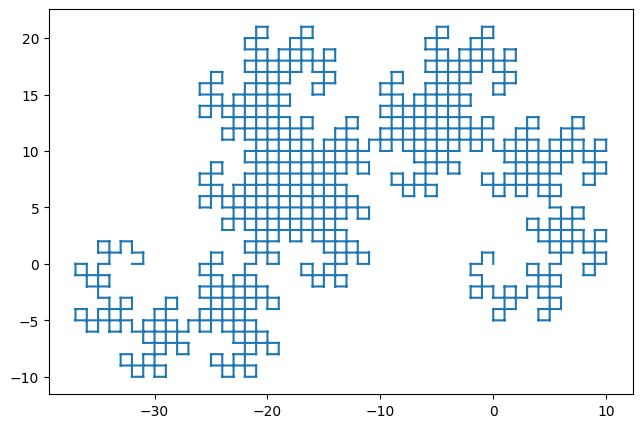

In [5]:
plot_state(DragonCurve, 10);

However, we can also easily define a new one. Here's an alternative ruleset to the Dragon Curve

100%|██████████| 8/8 [00:00<00:00, 9135.43it/s]


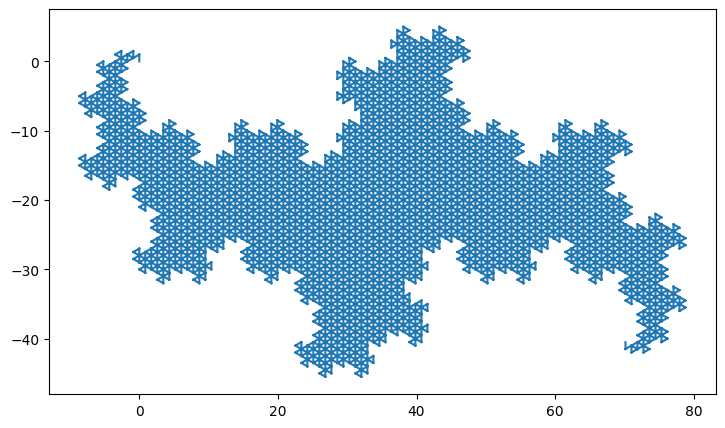

In [6]:
class DragonCurve2(LSystem):
    rules = {
        'F': 'F+F-F'
    }
    turning_angle=120
    initial_state='F'
plot_state(DragonCurve2, 8);

# Sierpinski Triangle

In [7]:
class Sierpinski2(LSystem):
    rules = {
        'F': 'F-G+F+G-F',
        'G': 'GG'
    }
    turning_angle=120
    initial_state='F-G-G'

100%|██████████| 6/6 [00:00<00:00, 42366.71it/s]


100%|██████████| 6/6 [00:00<00:00, 30916.25it/s]


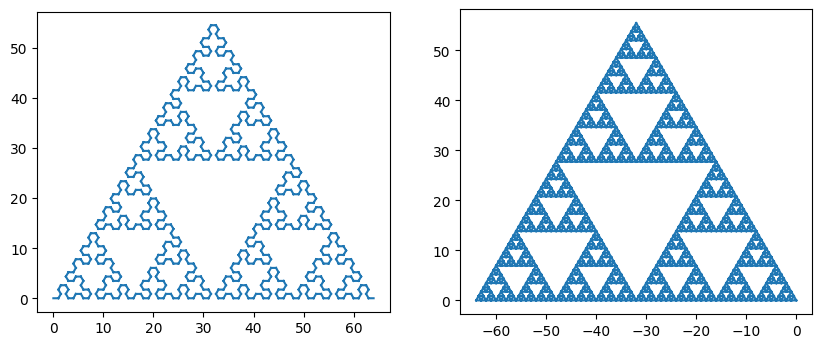

In [8]:
num_iters = 6

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(1, 2)

plot_state(Sierpinski, num_iters, heading=0, ax=axes[0])
plot_state(Sierpinski2, num_iters, heading=180, ax=axes[1]);

# Fractal Tree and Fractal Plant

In fact, we don't even need to define the ruleset, we can also change some other configurations

In [9]:
class WeirdFractalTree(FractalTree):
    turning_angle=90
class WeirdFractalPlant(FractalPlant):
    turning_angle=40

100%|██████████| 6/6 [00:00<00:00, 10927.41it/s]


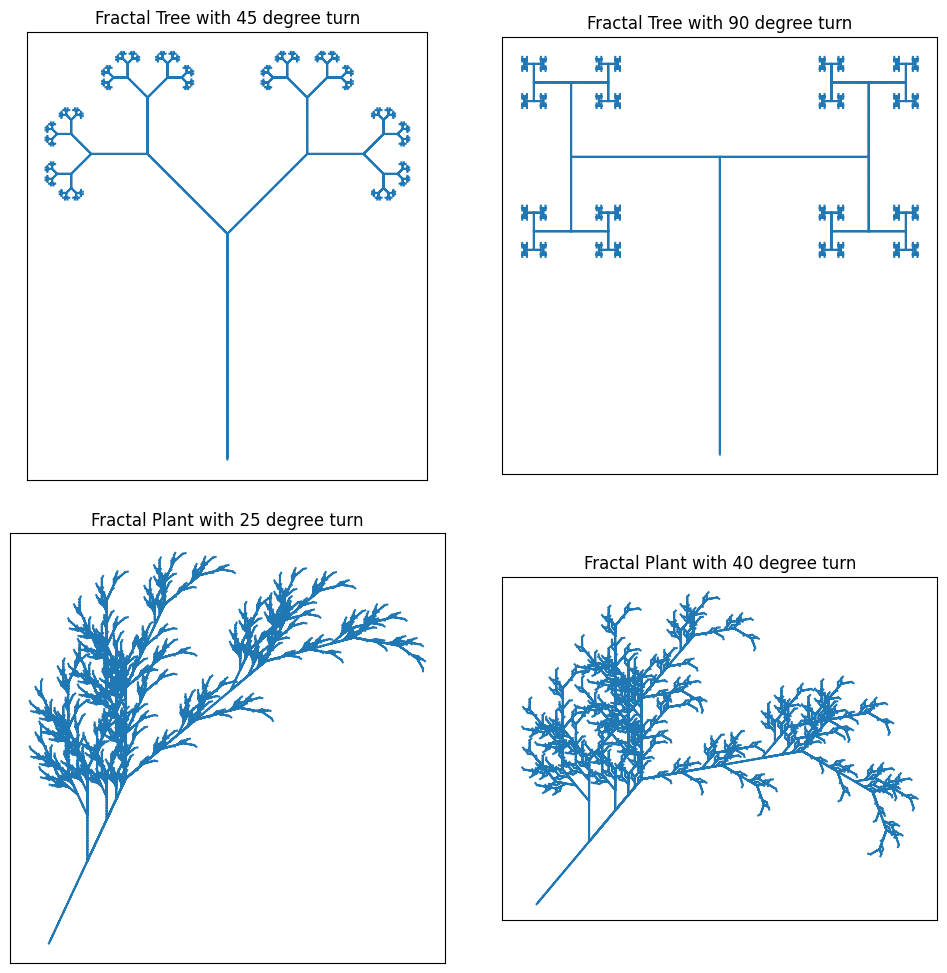

In [10]:
num_iters = [8, 8, 6, 6]
rulesets = [FractalTree, WeirdFractalTree, FractalPlant, WeirdFractalPlant]

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(2, 2).flatten()

fig.tight_layout()
for i, ruleset in enumerate(rulesets):
    plot_state(ruleset, num_iters[i], ax=axes[i])

    axes[i].set_title(f'Fractal {'Tree' if i < 2 else 'Plant'}'
                      f' with {ruleset.turning_angle} degree turn')
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

# Using `shrink_factor`

There is also a shrink factor attribute that corresponds to the grammars:
- `*`: multiply the current length of line segment by `shrink_factor`
- `/`: mutliply the current length of line segment by `1/shrink_factor`

This can be applied to the Fractal Tree to create larger branches

In [ ]:
class NicerFractalTree(LSystem):
    rules = {
        'F': 'G[*+F]-F',
        ']': ']/'
    }
    turning_angle = FractalTree.turning_angle
    initial_state = FractalTree.initial_state
    shrink_factor = .7

class NFT2(NicerFractalTree):
    turning_angle = 60
class NFT3(NicerFractalTree):
    turning_angle = 90
class NFT4(NicerFractalTree):
    turning_angle = 135

100%|██████████| 8/8 [00:00<00:00, 34134.72it/s]


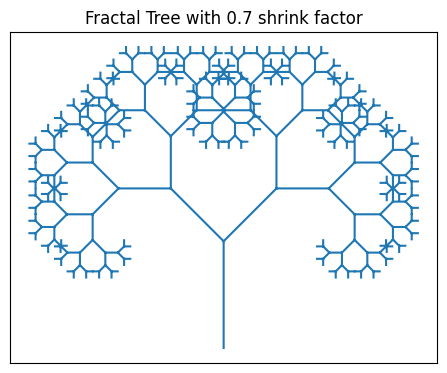

In [12]:
num_iters = 8

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

fig.tight_layout()
plot_state(NicerFractalTree, num_iters, ax=ax)

ax.set_title(f'Fractal Tree with {NicerFractalTree.shrink_factor} shrink factor')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);

100%|██████████| 8/8 [00:00<00:00, 24474.42it/s]


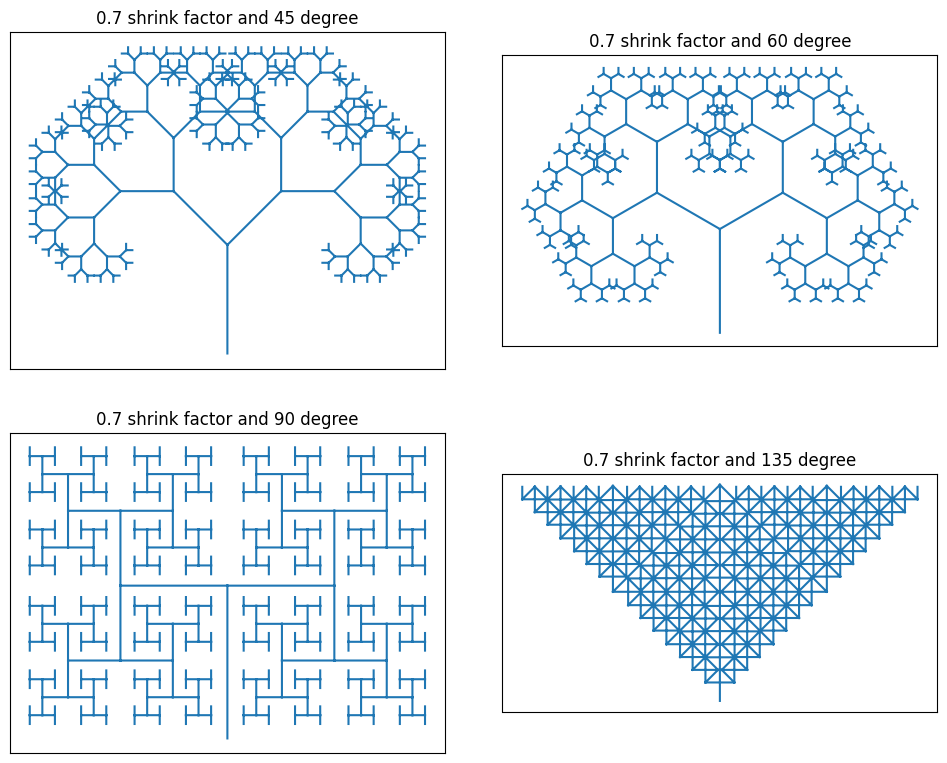

In [25]:
num_iters = 8
rulesets = [NicerFractalTree, NFT2, NFT3, NFT4]

fig = plt.figure(figsize=(10, 8))
axes = fig.subplots(2, 2).flatten()

fig.tight_layout()
for i, ruleset in enumerate(rulesets):
    plot_state(ruleset, num_iters, ax=axes[i])

    axes[i].set_title(f'{ruleset.shrink_factor} shrink factor and {ruleset.turning_angle} degree')
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])